In [8]:
import numpy as np
from PIL import Image

# Assuming the image has channels as the last dimension.
# filter.shape -> (kernel_size, kernel_size, channels)
# image.shape -> (width, height, channels)
def convolve(image, filter, padding = (1, 1)):
    # For this to work neatly, filter and image should have the same number of channels
    # Alternatively, filter could have just 1 channel or 2 dimensions
    
    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1) # Convert 2D grayscale images to 3D
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1) # Same with filters
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1) # Give filter the same channel count as the image
    
    #print(filter.shape, image.shape)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]
    
    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1, 
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1
    
    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])
    
    for x in range(padded_image.shape[0] - size_x + 1): # -size_x + 1 is to keep the window within the bounds of the image
        for y in range(padded_image.shape[1] - size_y + 1):

            # Creates the window with the same size as the filter
            window = padded_image[x:x + size_x, y:y + size_y]

            # Sums over the product of the filter and the window
            output_values = np.sum(filter * window, axis=(0, 1)) 

            # Places the calculated value into the output_array
            output_array[x, y] = output_values
            
    return output_array

In [9]:
filter = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1],
], dtype=np.float32)/256 # Box Filter

image = Image.open('vd.png')
image_arr = np.array(image)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(255 * convolved_arr), 'RGB') # Convolved Image

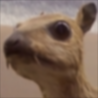

In [10]:
convolved

In [30]:
v1 = np.array([[1,0,0]])
v2 = np.array([[0,1,0]])
v3 = np.array([[0,0,1]])

In [31]:
m1 = v1 * v1.T * 10
m2 = v2 * v2.T * 5
m3 = v3 * v3.T * 1

In [39]:
sig = m1 + m2 + m3
sig

array([[10,  0,  0],
       [ 0,  5,  0],
       [ 0,  0,  1]])

In [40]:
res = sig * v2
res

array([[0, 0, 0],
       [0, 5, 0],
       [0, 0, 0]])

In [38]:
np.linalg.norm(res, ord=2) ** 2

25.0